<a href="https://colab.research.google.com/github/KavishaMadani/machine-learning/blob/main/Naive_Bayes_and_Perceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Name: Kavisha Madani


Student ID: 202318007

Accuracy: 0.8666666666666667


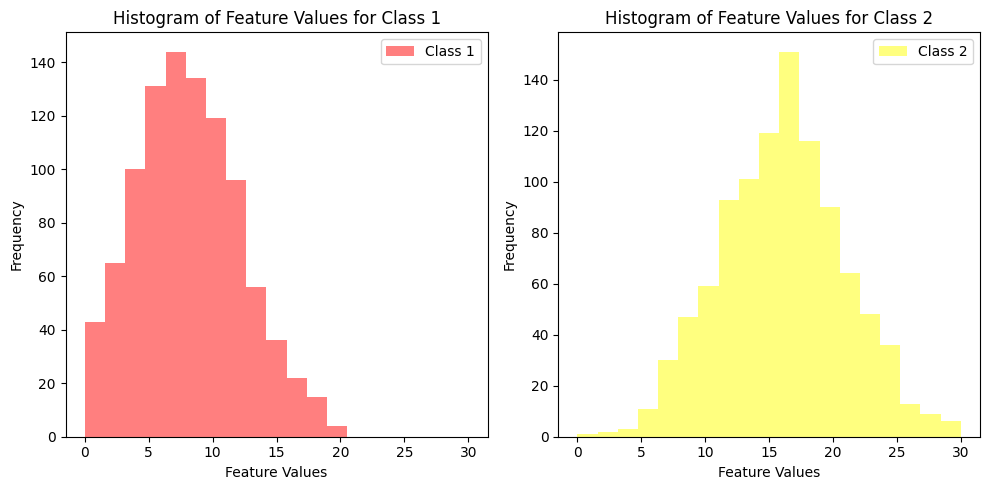

Predicted Class: class2
Predicted Class: class2
Predicted Class: class1


In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

np.random.seed(42)
samples1 = np.random.normal(5, 20, 50)
samples2 = np.random.normal(11, 10, 50)
samples3 = np.random.normal(20, 8, 50)

labels1 = np.zeros(50)
labels2 = np.ones(50)
labels3 = np.ones(50)

features = np.concatenate((samples1, samples2, samples3))
labels = np.concatenate((labels1, labels2, labels3))
features = features.reshape(-1, 1)

X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

classifier = GaussianNB()
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

import matplotlib.pyplot as plt

class_params = {
    'class1': {'mean': 8, 'variance': 20},
    'class2': {'mean': 16, 'variance': 25}
}

bins = np.linspace(0, 30, 20)

np.random.seed(0)
data_class1 = np.random.normal(class_params['class1']['mean'],
                                np.sqrt(class_params['class1']['variance']), 1000)
data_class2 = np.random.normal(class_params['class2']['mean'],
                                np.sqrt(class_params['class2']['variance']), 1000)

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.hist(data_class1, bins=bins, alpha=0.5, label='Class 1', color='red')
plt.xlabel('Feature Values')
plt.ylabel('Frequency')
plt.title('Histogram of Feature Values for Class 1')
plt.legend()

plt.subplot(1, 2, 2)
plt.hist(data_class2, bins=bins, alpha=0.5, label='Class 2', color='yellow')
plt.xlabel('Feature Values')
plt.ylabel('Frequency')
plt.title('Histogram of Feature Values for Class 2')
plt.legend()

plt.tight_layout()
plt.show()

def calculate_conditional_probability(feature_value, mean, variance, alpha=1):
    p = (1 / np.sqrt(2 * np.pi * variance)) * np.exp(-((feature_value - mean) ** 2) / (2 * variance))
    return (p + alpha) / (alpha * len(bins) + np.sum(p))

def naive_bayes_classifier(features, apriori_probabilities):
    posterior_probabilities = {}
    for class_label, params in class_params.items():
        prior_probability = apriori_probabilities[class_label]
        conditional_probability = 1
        for feature_idx, feature_value in enumerate(features):
            conditional_probability *= calculate_conditional_probability(feature_value,
                                                                          params['mean'],
                                                                          params['variance'])
        posterior_probabilities[class_label] = conditional_probability * prior_probability
    return max(posterior_probabilities, key=posterior_probabilities.get)

feature_values = [10, 18]
apriori_probabilities = {'class1': 0.5, 'class2': 0.5}
predicted_class = naive_bayes_classifier(feature_values, apriori_probabilities)
print("Predicted Class:", predicted_class)

feature_values = [10, 18]
apriori_probabilities = {'class1': 0.3, 'class2': 0.7}
predicted_class = naive_bayes_classifier(feature_values, apriori_probabilities)
print("Predicted Class:", predicted_class)

feature_values = [10, 18]
apriori_probabilities = {'class1': 0.7, 'class2': 0.3}
predicted_class = naive_bayes_classifier(feature_values, apriori_probabilities)
print("Predicted Class:", predicted_class)


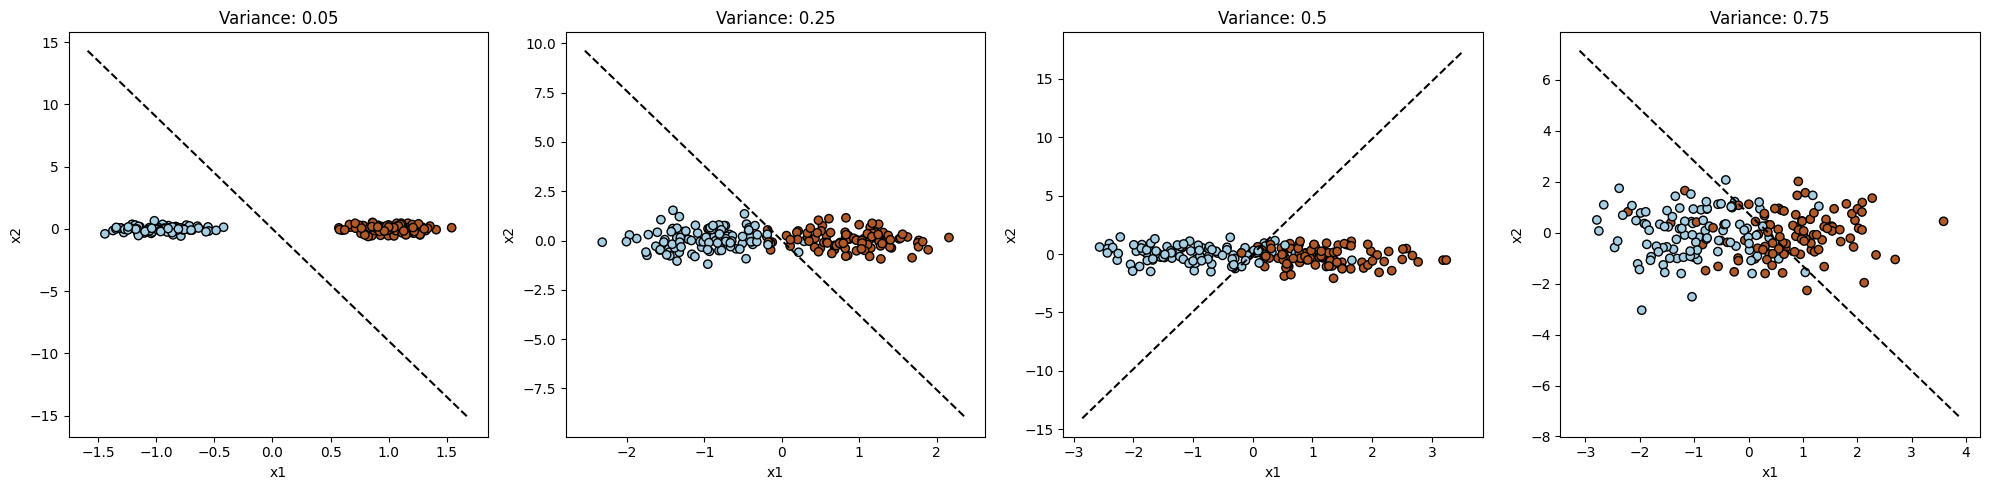

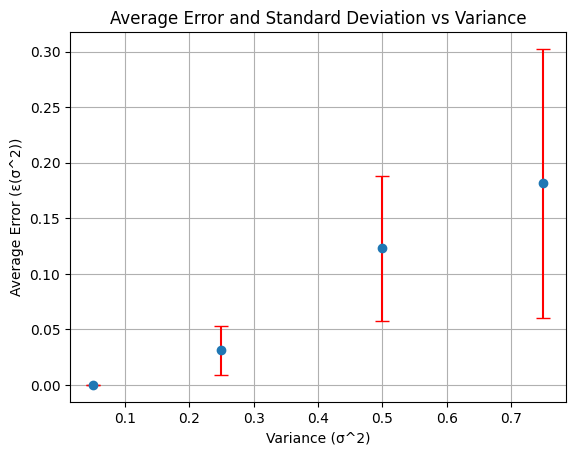

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Perceptron
from sklearn.utils import shuffle

# Function to generate dataset
def generate_data(mean, variance, n_samples=100):
    X = np.random.multivariate_normal(mean, np.eye(2)*variance, n_samples)
    return X

# Function to compute the average error and standard deviation
def compute_statistics(errors):
    average_error = np.mean(errors)
    standard_deviation = np.sqrt(np.mean((errors - average_error) ** 2))
    return average_error, standard_deviation

# Variance values for the simulation
variance_values = [0.05, 0.25, 0.50, 0.75]
n_runs = 50  # Number of runs per variance value
n_samples = 100  # Number of samples for each class

# Arrays to store the average errors and standard deviations
average_errors = []
standard_deviations = []

# Set up the plot for the decision boundaries
fig, axes = plt.subplots(1, 4, figsize=(20, 5))
axes = axes.ravel()

for i, variance in enumerate(variance_values):
    errors = []
    for _ in range(n_runs):
        # Generate dataset
        X1 = generate_data([1, 0], variance, n_samples)
        X0 = generate_data([-1, 0], variance, n_samples)
        y1 = np.ones(n_samples)
        y0 = -np.ones(n_samples)
        X = np.vstack((X1, X0))
        y = np.concatenate((y1, y0))
        X, y = shuffle(X, y)

        # Initialize and train Perceptron
        clf = Perceptron(tol=1e-3, random_state=0, max_iter=1000)
        clf.fit(X, y)

        # Evaluate Perceptron
        predictions = clf.predict(X)
        error = np.mean(predictions != y)
        errors.append(error)

    # Compute statistics for the current variance
    e, s = compute_statistics(errors)
    average_errors.append(e)
    standard_deviations.append(s)

    # Plot the generated points for the current variance
    axes[i].scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired, edgecolor='k')
    # Calculate the decision boundary line
    w = clf.coef_[0]
    b = clf.intercept_[0]
    x_values = np.linspace(*axes[i].get_xlim(), 2)
    y_values = -(w[0] * x_values + b) / w[1]
    # Plot the decision boundary line
    axes[i].plot(x_values, y_values, 'k--')
    axes[i].set_title(f'Variance: {variance}')
    axes[i].set_xlabel('x1')
    axes[i].set_ylabel('x2')

# Adjust layout
plt.tight_layout()
plt.show()

# Plotting average errors and standard deviations
plt.errorbar(variance_values, average_errors, yerr=standard_deviations, fmt='o', ecolor='r', capsize=5)
plt.xlabel('Variance (σ^2)')
plt.ylabel('Average Error (ε(σ^2))')
plt.title('Average Error and Standard Deviation vs Variance')
plt.grid(True)
plt.show()


{'uci_id': 53, 'name': 'Iris', 'repository_url': 'https://archive.ics.uci.edu/dataset/53/iris', 'data_url': 'https://archive.ics.uci.edu/static/public/53/data.csv', 'abstract': 'A small classic dataset from Fisher, 1936. One of the earliest known datasets used for evaluating classification methods.\n', 'area': 'Biology', 'tasks': ['Classification'], 'characteristics': ['Tabular'], 'num_instances': 150, 'num_features': 4, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1936, 'last_updated': 'Tue Sep 12 2023', 'dataset_doi': '10.24432/C56C76', 'creators': ['R. A. Fisher'], 'intro_paper': {'title': 'The Iris data set: In search of the source of virginica', 'authors': 'A. Unwin, K. Kleinman', 'published_in': 'Significance, 2021', 'year': 2021, 'url': 'https://www.semanticscholar.org/paper/4599862ea877863669a6a8e63a3c707a787d5d7e', 'doi': '1740-9713.01589'}, 'add

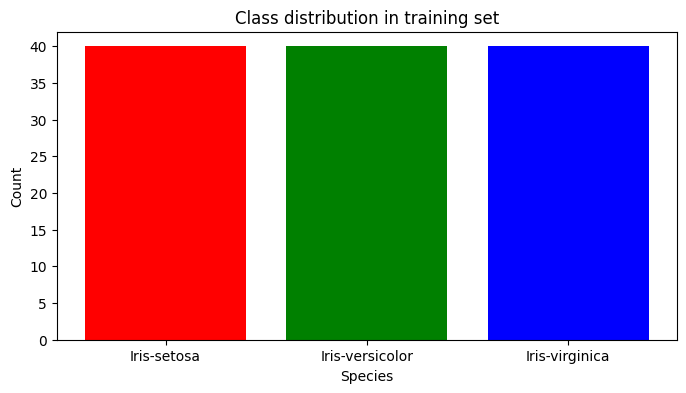

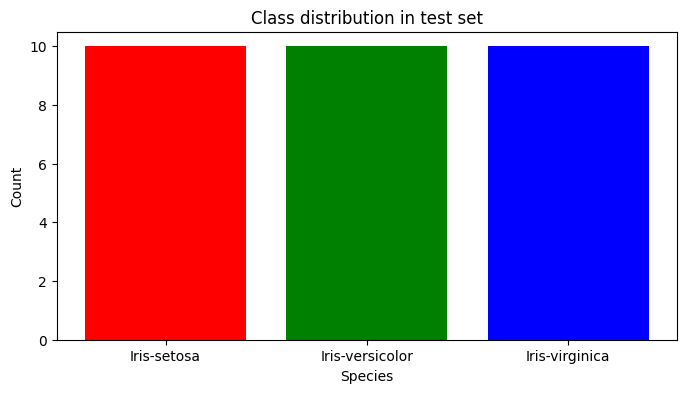

In [ ]:
!pip install ucimlrepo

from ucimlrepo import fetch_ucirepo
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np

# fetch dataset
iris = fetch_ucirepo(id=53)

# data (as pandas dataframes)
X = iris.data.features
y = iris.data.targets

# metadata
print(iris.metadata)

# variable information
print(iris.variables)

# Split the data into 80% training and 20% testing, with balanced labels
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Function to visualize the distribution of the classes
def plot_distribution(y, dataset_type):
    unique, counts = np.unique(y, return_counts=True)
    plt.figure(figsize=(8, 4))
    plt.bar(unique, counts, color=['red', 'green', 'blue'])
    plt.title(f'Class distribution in {dataset_type} set')
    plt.xlabel('Species')
    plt.ylabel('Count')
    plt.xticks(unique, unique)  # Use the unique class names as labels
    plt.show()

# Plot distribution for training set
plot_distribution(y_train, 'training')

# Plot distribution for test set
plot_distribution(y_test, 'test')


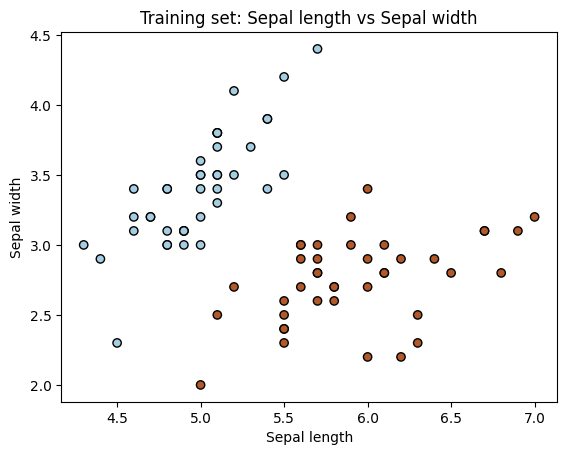

Training error: 0.03
Test error: 0.00


In [ ]:
from ucimlrepo import fetch_ucirepo
from sklearn.linear_model import Perceptron
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np

# fetch dataset
iris = fetch_ucirepo(id=53)

# data (as pandas dataframes)
X = iris.data.features.values
y = iris.data.targets.values.flatten()  # Flatten y in case it is an array of arrays

# Define a mapping for the class labels to integers
unique_classes = np.unique(y)
class_mapping = {label: idx for idx, label in enumerate(unique_classes)}
y_numeric = np.array([class_mapping[label] for label in y])

# Filter out only 'setosa' and 'versicolor' (class labels 0 and 1)
setosa_versicolor_filter = (y_numeric == 0) | (y_numeric == 1)
X_filtered = X[setosa_versicolor_filter][:, :2]  # Select only sepal length and sepal width features
y_filtered = y_numeric[setosa_versicolor_filter]

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_filtered, y_filtered, test_size=0.2, stratify=y_filtered, random_state=42)

# Visualize the first two features of the training set
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.Paired, edgecolors='k')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.title('Training set: Sepal length vs Sepal width')
plt.show()

# Initialize and train the Perceptron
perceptron = Perceptron(max_iter=1000, tol=1e-3, random_state=42)
perceptron.fit(X_train, y_train)

# Predict on the training and test sets
y_pred_train = perceptron.predict(X_train)
y_pred_test = perceptron.predict(X_test)

# Calculate the errors
training_error = 1 - accuracy_score(y_train, y_pred_train)
test_error = 1 - accuracy_score(y_test, y_pred_test)

# Report the errors
print(f'Training error: {training_error:.2f}')
print(f'Test error: {test_error:.2f}')
